In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../data/input_data/MAIN_DATASET.csv")[:-7381]
print(df.shape)
display(df)

(44280, 20)


,Unnamed: 0,index,NO2_price,NO2_load_actual,NO2_load_forecasted,NO2_load_delta,NO2_generation_actual,NO2_generation_forecast,NO2_generation_delta,NO5_price,NO5_load_actual,NO5_load_forecasted,NO5_load_delta,NO5_generation_actual,NO5_generation_forecast,NO5_generation_delta,NO2_Fyllingsgrad_NVE,NO5_Fyllingsgrad_NVE,dato_id,date_time
0,0,2016-01-03 12:00:00+01:00,16.37,5099,5223,124,16426,8473,-7953,17.94,2659,2542,-117,8802,4404,-4398,0.890802,0.759365,2016-01-03 12:00:00+01:00,2016-01-03-12
1,1,2016-01-03 13:00:00+01:00,16.35,5134,5246,112,16580,8452,-8128,17.66,2666,2567,-99,9022,4442,-4580,0.890601,0.759098,2016-01-03 13:00:00+01:00,2016-01-03-13
2,2,2016-01-03 14:00:00+01:00,16.35,5113,5234,121,16722,8486,-8236,17.66,2674,2561,-113,9308,4520,-4788,0.890400,0.758831,2016-01-03 14:00:00+01:00,2016-01-03-14
3,3,2016-01-03 15:00:00+01:00,16.30,5198,5303,105,17192,8576,-8616,17.60,2718,2614,-104,9946,4662,-5284,0.890199,0.758564,2016-01-03 15:00:00+01:00,2016-01-03-15
4,4,2016-01-03 16:00:00+01:00,16.45,5280,5419,139,17666,8896,-8770,18.61,2775,2641,-134,10378,4831,-5547,0.889998,0.758297,2016-01-03 16:00:00+01:00,2016-01-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,44275,2021-01-21 07:00:00+01:00,35.32,5450,5873,423,15060,8120,-6940,35.32,2505,1758,-747,6558,3501,-3057,0.800103,0.643996,2021-01-21 07:00:00+01:00,2021-01-21-07
44276,44276,2021-01-21 08:00:00+01:00,37.23,5555,5901,346,16194,8492,-7702,37.23,2500,1974,-526,7730,4448,-3282,0.799964,0.643776,2021-01-21 08:00:00+01:00,2021-01-21-08
44277,44277,2021-01-21 09:00:00+01:00,35.29,5525,5701,176,15576,8235,-7341,35.29,2490,2067,-423,6910,3635,-3275,0.799825,0.643555,2021-01-21 09:00:00+01:00,2021-01-21-09
44278,44278,2021-01-21 10:00:00+01:00,33.01,5627,5656,29,15250,7953,-7297,33.01,2499,2039,-460,6568,3382,-3186,0.799686,0.643335,2021-01-21 10:00:00+01:00,2021-01-21-10


# Conditional errors
We want to study wether the errors of the forecasted values are conditional or not, i.e. if they are dependant on the model state or if they are distributed according to Gaussian noise

Text(0, 0.5, 'Forecast - Actual')

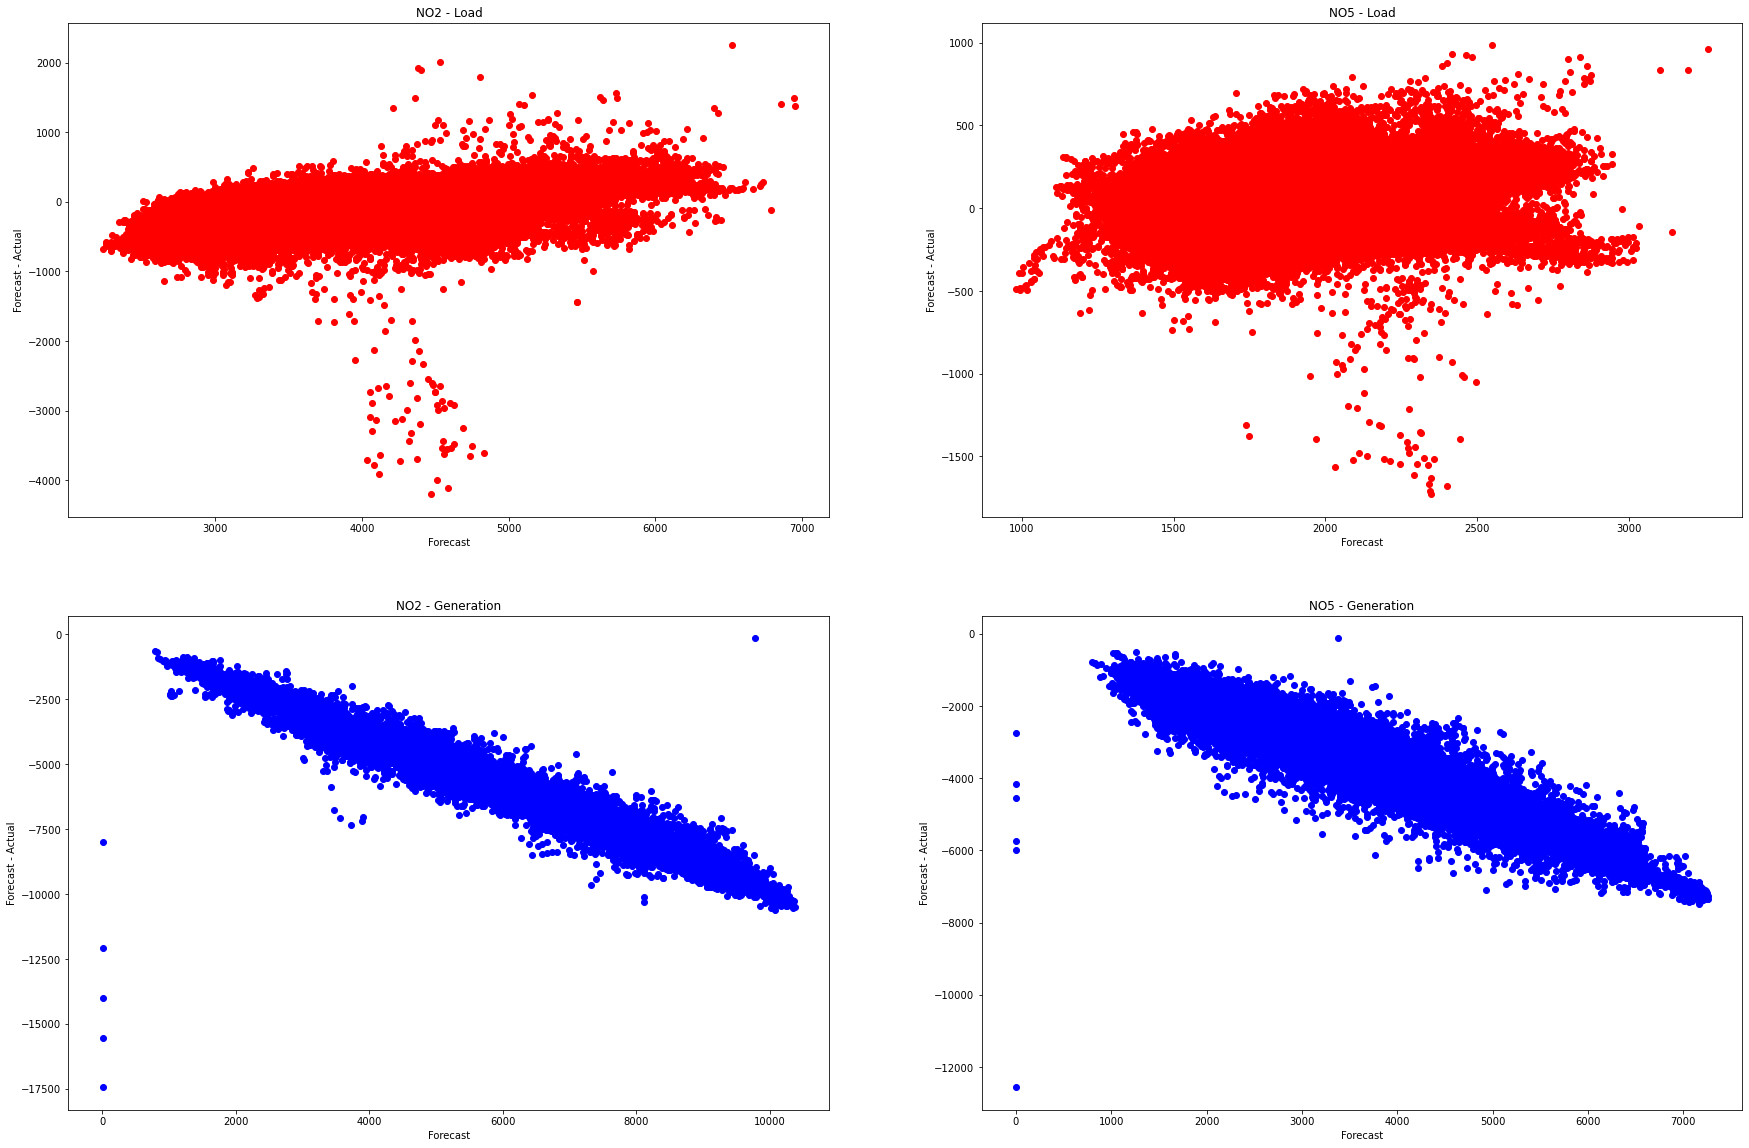

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(30, 20)

axes[0,0].plot(df['NO2_load_forecasted'], df['NO2_load_delta'], 'ro')
axes[0,0].set_title("NO2 - Load")
axes[0,0].set_xlabel("Forecast")
axes[0,0].set_ylabel("Forecast - Actual")

axes[1,0].plot(df['NO2_generation_forecast'], df['NO2_generation_delta'], 'bo')
axes[1,0].set_title("NO2 - Generation")
axes[1,0].set_xlabel("Forecast")
axes[1,0].set_ylabel("Forecast - Actual")

axes[0,1].plot(df['NO5_load_forecasted'], df['NO5_load_delta'], 'ro')
axes[0,1].set_title("NO5 - Load")
axes[0,1].set_xlabel("Forecast")
axes[0,1].set_ylabel("Forecast - Actual")

axes[1,1].plot(df['NO5_generation_forecast'], df['NO5_generation_delta'], 'bo')
axes[1,1].set_title("NO5 - Generation")
axes[1,1].set_xlabel("Forecast")
axes[1,1].set_ylabel("Forecast - Actual")

From the above plot, it can be seen that generation forecast has strongly conditional errors. That means that the errors are dependant on the forecast condition. Here, we see that the generation forecast tend too underforecast large generation values, as seen by the negative incline of the spread in values. As such, it can be assumed that generation forecast for both NO2 and NO5 forecast less severe values than what is actually observed, especially for most severe values. 

The same can not be said for Load forecasting, which tend to evenly distribute along a horizontal flat line, with gaussian properties. However, this is more true for NO5 which exhibits a greater spread than NO2. As such, the load forecast tend to have unconditional errors, i.e. the forecast errors are not dependant on the forecast condition.

Unconditional errors are a favorable property, as it results in less systematic errors derived from the forecast. As such, if using conditional errors in the model, the model could attain the same properties and conditional errors. In total it could end up being a continuation of an erroneous pattern. However, the same would not be the case for Load, as the errors are unconditional. 